<center><h1> Case Study </h1> </center>

In [1]:
# Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Data Exploration and Evaluation

### 1.1 Load and Explore

In [2]:
df = pd.read_csv('loan.csv', usecols=['loan_amnt', 
                                'funded_amnt', 
                                'term', 
                                'int_rate', 
                                'grade', 
                                'annual_inc', 
                                'issue_d', 
                                'dti', 
                                'revol_bal', 
                                'total_pymnt', 
                                'loan_status'])

In [3]:
df.shape # get shape

(887379, 11)

In [4]:
df.head(10) # get first 10 rows 

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,loan_status,dti,revol_bal,total_pymnt
0,5000.0,5000.0,36 months,10.65,B,24000.0,Dec-2011,Fully Paid,27.65,13648.0,5861.071414
1,2500.0,2500.0,60 months,15.27,C,30000.0,Dec-2011,Charged Off,1.00,1687.0,1008.710000
2,2400.0,2400.0,36 months,15.96,C,12252.0,Dec-2011,Fully Paid,8.72,2956.0,3003.653644
3,10000.0,10000.0,36 months,13.49,C,49200.0,Dec-2011,Fully Paid,20.00,5598.0,12226.302212
4,3000.0,3000.0,60 months,12.69,B,80000.0,Dec-2011,Current,17.94,27783.0,3242.170000
5,5000.0,5000.0,36 months,7.90,A,36000.0,Dec-2011,Fully Paid,11.20,7963.0,5631.377753
6,7000.0,7000.0,60 months,15.96,C,47004.0,Dec-2011,Current,23.51,17726.0,8136.840000
7,3000.0,3000.0,36 months,18.64,E,48000.0,Dec-2011,Fully Paid,5.35,8221.0,3938.144334
8,5600.0,5600.0,60 months,21.28,F,40000.0,Dec-2011,Charged Off,5.55,5210.0,646.020000
9,5375.0,5375.0,60 months,12.69,B,15000.0,Dec-2011,Charged Off,18.08,9279.0,1476.190000


In [5]:
df.sample(10) # get 10 random rows

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,loan_status,dti,revol_bal,total_pymnt
519837,12000.0,12000.0,36 months,9.17,B,40000.0,Nov-2015,Current,14.73,16913.0,370.32
380439,21000.0,21000.0,36 months,8.39,A,80000.0,May-2014,Current,20.61,23126.0,12575.15
883813,15000.0,15000.0,36 months,15.59,D,55000.0,Jan-2015,Current,26.21,8013.0,6265.98
541289,18325.0,18325.0,36 months,13.67,C,53173.2,Nov-2015,Current,25.10,19616.0,1225.88
252175,7700.0,7700.0,36 months,13.66,C,41600.0,Nov-2014,Current,13.59,1776.0,3660.76
262792,30000.0,30000.0,60 months,12.99,C,71300.0,Nov-2014,Current,17.00,29941.0,9532.51
808013,28000.0,28000.0,36 months,7.89,A,144000.0,Mar-2015,Current,22.59,66657.0,8735.45
490597,10000.0,10000.0,60 months,18.49,E,68000.0,Dec-2015,Current,23.14,8681.0,236.07
288999,31075.0,31075.0,60 months,24.50,F,82000.0,Oct-2014,Current,23.62,41724.0,13502.85
727183,20000.0,20000.0,60 months,13.99,C,70000.0,Jun-2015,In Grace Period,13.83,22093.0,2776.08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 11 columns):
loan_amnt      887379 non-null float64
funded_amnt    887379 non-null float64
term           887379 non-null object
int_rate       887379 non-null float64
grade          887379 non-null object
annual_inc     887375 non-null float64
issue_d        887379 non-null object
loan_status    887379 non-null object
dti            887379 non-null float64
revol_bal      887379 non-null float64
total_pymnt    887379 non-null float64
dtypes: float64(7), object(4)
memory usage: 74.5+ MB


* **There is a date variable: I will convert it to the correct type**

In [7]:
df['issue_d'] = pd.to_datetime(df['issue_d'])

In [8]:
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 11 columns):
loan_amnt      887379 non-null float64
funded_amnt    887379 non-null float64
term           887379 non-null object
int_rate       887379 non-null float64
grade          887379 non-null object
annual_inc     887375 non-null float64
issue_d        887379 non-null datetime64[ns]
loan_status    887379 non-null object
dti            887379 non-null float64
revol_bal      887379 non-null float64
total_pymnt    887379 non-null float64
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 74.5+ MB


### 1.2 Look at different levels of aggregations

In [9]:
means = df.groupby(['term', 'grade', 'loan_status', df['issue_d'].dt.year]).mean()

In [10]:
means.head()

loan_amnt  funded_amnt  int_rate  \
term       grade loan_status issue_d                                       
 36 months A     Charged Off 2007     2000.000000  2000.000000  7.750000   
                             2008     8211.764706  7357.352941  8.345294   
                             2009     7457.594937  7457.594937  8.916203   
                             2010     8045.045045  7545.945946  7.205856   
                             2011     7599.719888  7584.453782  7.382689   

                                        annual_inc        dti     revol_bal  \
term       grade loan_status issue_d                                          
 36 months A     Charged Off 2007     24000.000000   2.400000    949.000000   
                             2008     53167.764706   8.607059  19068.941176   
                             2009     55953.139241  11.269747  12467.341772   
                             2010     54519.585586  13.368198  12107.477477   
                             2011     51672.414482  14.209776  11488.708683   

                                      total_pymnt  
term       grade loan_status issue_d               
 36 months A     Charged Off 2007     1111.460000  
                             2008     4885.511967  
                             2009     4238.002302  
                             2010     4803.274414  
                             2011     4121.204678

In [11]:
means.tail()

loan_amnt   funded_amnt  \
term       grade loan_status        issue_d                               
 60 months G     Late (31-120 days) 2011     14600.000000  14600.000000   
                                    2012     23000.000000  23000.000000   
                                    2013     24542.592593  24542.592593   
                                    2014     21221.785714  21221.785714   
                                    2015     21901.495726  21901.495726   

                                              int_rate     annual_inc  \
term       grade loan_status        issue_d                             
 60 months G     Late (31-120 days) 2011     21.590000  185000.000000   
                                    2012     24.795000   67500.000000   
                                    2013     25.557407   97346.222222   
                                    2014     25.882000   77361.820000   
                                    2015     26.670940   74822.001368   

                                                   dti     revol_bal  \
term       grade loan_status        issue_d                            
 60 months G     Late (31-120 days) 2011     21.550000  28580.000000   
                                    2012     22.410000  14820.500000   
                                    2013     16.038889  15289.259259   
                                    2014     18.947429  14088.385714   
                                    2015     19.718974  13818.188034   

                                              total_pymnt  
term       grade loan_status        issue_d                
 60 months G     Late (31-120 days) 2011     21666.900000  
                                    2012     23959.725000  
                                    2013     18621.598889  
                                    2014      8828.671286  
                                    2015      3691.431795

### 1.3 Check for Missing values and or repeated rows 

In [12]:
df[df.duplicated()==True]

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,loan_status,dti,revol_bal,total_pymnt


**Good news: There are no duplicated rows!**

In [13]:
df.isnull().sum()

loan_amnt      0
funded_amnt    0
term           0
int_rate       0
grade          0
annual_inc     4
issue_d        0
loan_status    0
dti            0
revol_bal      0
total_pymnt    0
dtype: int64

**Only one column, annual income has missing values that too only 4 values.**
* Now let's explore those missing values: 

In [14]:
df[df.isnull().any(axis=1)]

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,loan_status,dti,revol_bal,total_pymnt
42449,5000.0,5000.0,36 months,7.43,A,NaN,2007-08-01,Does not meet the credit policy. Status:Fully ...,1.0,0.0,5593.46
42450,7000.0,7000.0,36 months,7.75,A,NaN,2007-08-01,Does not meet the credit policy. Status:Fully ...,1.0,0.0,7867.53
42480,6700.0,6700.0,36 months,7.75,A,NaN,2007-07-01,Does not meet the credit policy. Status:Fully ...,1.0,0.0,7530.42
42533,6500.0,6500.0,36 months,8.38,A,NaN,2007-06-01,Does not meet the credit policy. Status:Fully ...,4.0,0.0,7373.83


* Compare with any random 4 rows to see the difference

In [15]:
df.sample(4) # get 4 random rows

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,loan_status,dti,revol_bal,total_pymnt
423496,17000.0,17000.0,36 months,13.65,C,90000.0,2014-03-01,Current,16.14,4058.0,12140.94
704441,2200.0,2200.0,36 months,12.29,C,63000.0,2015-07-01,Current,21.49,2752.0,438.78
431981,7000.0,7000.0,36 months,10.99,B,99000.0,2014-03-01,Fully Paid,8.00,3740.0,7956.66
536790,14000.0,14000.0,36 months,7.26,A,57000.0,2015-11-01,Current,15.87,3924.0,462.18


* Loan status looks *interesting* here for the **rows with missing annual income**...

In [16]:
df[df.isnull().any(axis=1)]['loan_status']

42449    Does not meet the credit policy. Status:Fully ...
42450    Does not meet the credit policy. Status:Fully ...
42480    Does not meet the credit policy. Status:Fully ...
42533    Does not meet the credit policy. Status:Fully ...
Name: loan_status, dtype: object

In [17]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

#### My evaluation

* Since these are less than **0.001%** of the rows, we can just drop them 
* Imputing them doesn't make sense here since that will leak data

In [18]:
df_no_na = df.dropna(axis = 0)

In [19]:
df_no_na.shape # we have dropped those 4 rows 

(887375, 11)

### 1.3 Describe the distribution of features

#### 1.3.1 Continuous features 

In [20]:
df_cont = df_no_na.select_dtypes(include = ["float64"])

In [21]:
df_cont.sample(5)

,loan_amnt,funded_amnt,int_rate,annual_inc,dti,revol_bal,total_pymnt
49483,5000.0,5000.0,6.62,120000.0,9.79,11359.0,5222.92
838711,23925.0,23925.0,21.67,75000.0,36.53,48272.0,6591.90
702975,3500.0,3500.0,11.53,125000.0,29.49,7782.0,3698.15
333877,10000.0,10000.0,8.39,80000.0,12.69,5337.0,5357.89
471437,35000.0,35000.0,9.17,93000.0,29.06,24962.0,0.00


In [22]:
# Let's look at the summary statistics first
df_cont.describe()

,loan_amnt,funded_amnt,int_rate,annual_inc,dti,revol_bal,total_pymnt
count,887375.000000,887375.000000,887375.000000,8.873750e+05,887375.000000,8.873750e+05,887375.000000
mean,14755.302719,14741.915678,13.246764,7.502759e+04,18.157113,1.692086e+04,7558.828791
std,8435.455353,8429.897443,4.381862,6.469830e+04,17.190629,2.242681e+04,7871.260790
min,500.000000,500.000000,5.320000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,8000.000000,8000.000000,9.990000,4.500000e+04,11.910000,6.443500e+03,1914.590000
50%,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,1.187500e+04,4894.950000
75%,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,2.082900e+04,10616.844231
max,35000.000000,35000.000000,28.990000,9.500000e+06,9999.000000,2.904836e+06,57777.579870


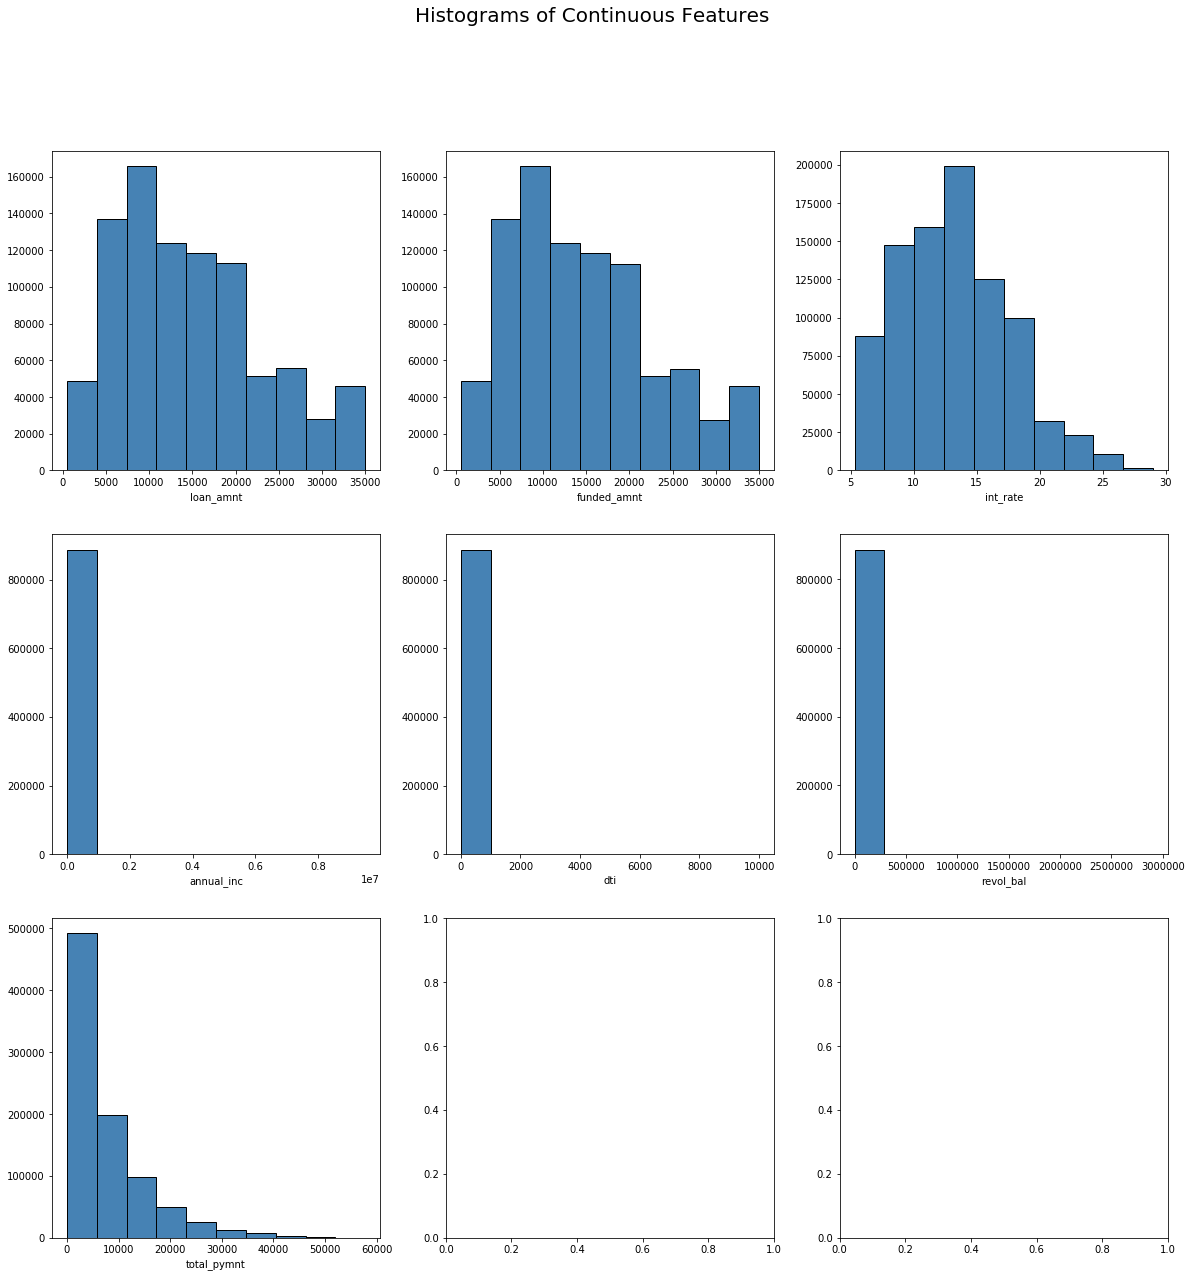

In [23]:
# Plot distributions of continuous features

fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 20))

for i, ax in enumerate(ax.ravel()):
    if i > 6:
        continue
    ax.hist(df_cont.iloc[:, i], color='steelblue', edgecolor='black', bins=10, linewidth=1.0)
    ax.set_xlabel(df_cont.columns.values[i], color='k')
        
fig.suptitle('Histograms of Continuous Features', fontsize=20)        
plt.show()

#### Comment: The distributions of the features are defined below
* Loan amount,  Funded amount and Interest rate seem to have a slight poitive skew; however, we can approximate them to be normally distributed 
* Total payment: Has an exponential distribution, higher values have exponentially lower counts
* Annual income, DTI and Revolv_bal also have exponential distributions, with very high values of lambda, i.e. the decay is much faster 

#### 1.3.2 Categorical features 

* **Let's look at the unique values of the categorical columns**

In [24]:
# separate categorical features 
df_cat = df_no_na.select_dtypes(include = ["object"])

In [25]:
df_cat.sample(5)

,term,grade,loan_status
687465,36 months,D,Current
699920,60 months,G,Current
770543,36 months,B,Current
830349,60 months,B,Current
211313,36 months,A,Fully Paid


In [26]:
df_cat['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [27]:
df_cat['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [28]:
df_cat['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

* **Summary statistics**

In [29]:
# Value Counts 
for col in df_cat:
    print("Column Name: ", col )
    print(" ")
    print(df_cat[col].value_counts())
    print(" ")

Column Name:  term
 
 36 months    621121
 60 months    266254
Name: term, dtype: int64
 
Column Name:  grade
 
B    254535
C    245860
A    148198
D    139542
E     70705
F     23046
G      5489
Name: grade, dtype: int64
 
Column Name:  loan_status
 
Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1984
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64
 


* **Visualisations** 

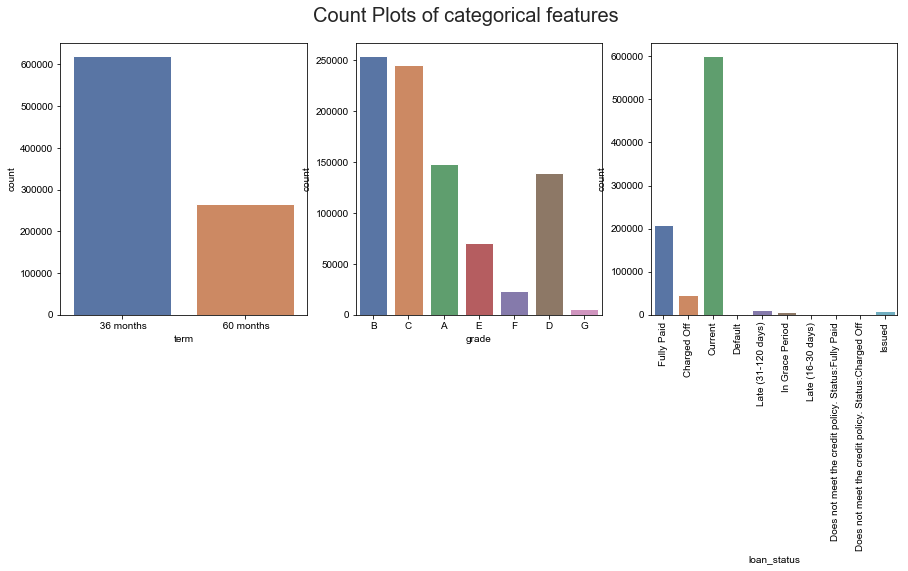

In [30]:
# Plot distributions of continuous features

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
sns.set(style="darkgrid")


sns.countplot(x="term", data = df_cat, ax=ax[0])
sns.countplot(x="grade", data = df_cat, ax=ax[1])

# Set tick labels for loan status separartely since they don't fit
labels = df_cat['loan_status'].unique()
ax[2].set_xticklabels(labels = labels, rotation=90)

sns.countplot(x="loan_status", data = df_cat, ax=ax[2])

        
fig.suptitle('Count Plots of categorical features', fontsize=20)        
plt.show()

#### Comment
* We see that most of the loand are 36 month loans 
* Grade B and C are the most common grades among the loans
* Similarly, for *loan status*, current is the most common status while the next common category is Fully paid followed by charged off. The rest of the categories are quite insignificant compared to these

* **Check out the date variable**

In [31]:
print("Min Date: ", df_no_na['issue_d'].min())
print("Min Date: ", df_no_na['issue_d'].max())

Min Date:  2007-06-01 00:00:00
Min Date:  2015-12-01 00:00:00


### Outliers in the dataset 

Given the skews in most of our continuous features, there exist sets of outliers; however, there is no point in removing them since I will be using an L2 penalty which reduces their effect on the model. 

It is possible to understand outlier behaviour in this dataset using many approaches such as:
* IsolationForest
* OneClassSVM
* Elliptic Envelope 

All of these are offered in sklearn and can be used to study these outliers; however, this is not the focus of this case study so will not be covered. 

## Part 2: Business Analysis

We are interested in evaluating whether the 36 month term loans would make for a good investment. Please investigate the following. Assume a 36 month investment period for each loan, and exclude loans with less than 36 months of data available.

In [32]:
# Subet datframe
df_36_only = df_no_na[df_no_na['term'] == ' 36 months']

### 1) What percentage of loans has been fully paid?


In [33]:
perc_fully_paid = len(df_36_only[df_36_only['loan_status'] == 'Fully Paid']) / len(df_36_only)
print("Percentage of loans Fully Paid: {:.2f}%".format(perc_fully_paid*100))

Percentage of loans Fully Paid: 26.98%


### 2) When bucketed by year of origination and grade, which cohort has the highest rate of defaults? Here you may assume that any loan which was not fully paid had “defaulted”.

* **If 'Defaulted' = 1** i.e. anywhere loan not fully paid
* **If 'Fully Paid' = 0**

In [34]:
df_36_only['loan_status'] = np.where(df_36_only['loan_status'] == 'Fully Paid', 0, 1)

/Users/pranjalbajaj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
# Check if the above code caused no errors
perc_fully_paid = len(df_36_only[df_36_only['loan_status'] == 0]) / len(df_36_only)
print("Percentage of loans Fully Paid {:.2f}%".format(perc_fully_paid*100))

Percentage of loans Fully Paid 26.98%


In [36]:
# Group by YEAR and grade
grouped = df_36_only.groupby([df_36_only['issue_d'].dt.year, 'grade'])

**Rate of Default = Default / Total (In group)**

In [37]:
# Apply function to get Default Rate

cohorts = grouped['loan_status'].agg([('perc_default', 
                             lambda x: ((x == 1).sum() / ((x == 0).sum() + (x == 1).sum())))])

#### As is clear from the Dataframe below, *2007 G* is the cohort with the highest default rate of basically 100%

In [38]:
# Sort values
cohorts.sort_values(by = ['perc_default'], ascending = False).head()

perc_default
issue_d grade              
2007    G          1.000000
2008    G          0.976744
2015    A          0.955312
        B          0.948912
        C          0.931936

### 3) When bucketed by year of origination and grade, what annualized rate of return have these loans generated on average?

* For simplicity, use the following approximation:
    * Annualized rate of return = (total_pymnt / funded_amnt) ^ (1/3) - 1

In [39]:
averages = grouped.agg({'funded_amnt': 'mean', 'total_pymnt': 'mean'})

In [40]:
# define annualized rate of return
averages['Annualized_Rate_of_Returns'] = ((averages['total_pymnt'] / averages['funded_amnt'])**(1/3))-1

In [41]:
averages.head()

funded_amnt  total_pymnt  Annualized_Rate_of_Returns
issue_d grade                                                      
2007    A      4945.945946  5396.874459                    0.029511
        B      8184.693878  8323.797551                    0.005633
        C      8132.978723  8245.527730                    0.004592
        D      7654.040404  7540.993273                   -0.004948
        E      7817.750000  7633.371200                   -0.007924

## Part 3: Modeling

Assumptions:

1. You are given the ability to invest in each loan independently; **i.e. IID Assumption**

2. You invest immediately following loan origination and hold to maturity (36 months); and 

3. All loan fields that would be known upon origination are made available to you. **i.e. No missing data**

#### Discussion

* Class 1 = Default 
* Class 0 = No Default 

#### Task: Predict Loan Default 

*  As a risk-averse investor, I would like to ensure that those loans that I predict to be safe (i.e. will not default) **will actually not default** since I would like to ensure that my investment is safe

* Hence, we cannot afford **False Negatives** 

* However, as an investor, I would like to be very sure of those I predict to default since I would not like to loose out on a perfectly good opportunity. Hence, **False Positives** are also costly. 

* Hence, we would like to ensure that both false positives and false negatives are minimized

* The choice of metric will depend on the imbalance of the classes, which we know from part 2 is already imbalanced towards the "will default" class.
    * In this case metrics that are robust to class imbalance such as:
        * AUC 
        * F1 Score: 2 * (precision * recall) / (precision + recall)

Precision =  True / Predicted to be True
* tp / (tp + fp) 

Recall = True / Actual Truth
* tp / (tp + fn) 

### Data preparation for modelling

In [42]:
# Libraries for preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Modelling
from sklearn.linear_model import LogisticRegression

# Splitting and Cross-validation 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

# Metrics 
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

#### 1. Drop missing data: Already dropped in the first part of this study

#### 2. Separate Features and Target

In [43]:
y = df_36_only['loan_status']
X = df_36_only.drop(['loan_status'], axis = 1)

In [44]:
print("Default% = {:.2f}%".format((len(y[y==1]) / len(y))*100))

Default% = 73.02%


#### 3. Drop columns that clearly don't add any value

In [45]:
X.shape

(621121, 10)

In [46]:
X.sample(5)

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt
710884,6000.0,6000.0,36 months,12.69,C,99650.0,2015-06-01,30.96,70965.0,1404.66
703362,16000.0,16000.0,36 months,7.89,A,37500.0,2015-07-01,38.50,16985.0,2996.47
705666,10000.0,10000.0,36 months,12.69,C,43000.0,2015-07-01,13.90,11329.0,2005.65
84676,8000.0,8000.0,36 months,19.20,D,50000.0,2013-10-01,8.45,7566.0,7937.70
408645,16000.0,16000.0,36 months,12.49,B,104000.0,2014-04-01,13.44,19208.0,11238.99


In [47]:
X.drop(['term', 'issue_d'], axis = 1, inplace =True)

In [48]:
X.sample(5)

,loan_amnt,funded_amnt,int_rate,grade,annual_inc,dti,revol_bal,total_pymnt
64084,6000.0,6000.0,8.90,A,60000.0,6.64,8691.0,6763.510002
226286,30000.0,30000.0,7.62,A,90000.0,0.66,4536.0,33201.883688
477501,24000.0,24000.0,6.89,A,120000.0,22.67,38405.0,0.000000
397187,18000.0,18000.0,8.90,A,64000.0,16.18,20886.0,19391.470000
312054,24925.0,24925.0,26.06,G,60000.0,33.72,56586.0,31888.330000


In [49]:
X.shape

(621121, 8)

#### 4. OneHotEncoding Categorical Variables

In [50]:
X_one_hot = pd.get_dummies(X)

#### 5. Test Train Split: IID assumption 

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size = 0.33)

#### 6. Fit Logistic Regression Mode

* *penalty = l2* is default, it makes logistic less prone to overfitting (It's basically the ridge penalty)

* *C = 1* is the default hyperparameter value which is used to tune Logistic Regression

* *class_weight = balanced* mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)). 
**(We use this is because we have an imbalanced dataset)**

* *max_iter* used with solver == ‘sag’ (we need to vary the number of iterations to allow the to function to converge

* *solver = 'sag'* corresponds to Stochastic Average Gradient and makes computation faster for large datasets such as this one

* *random_state* used with solver == ‘sag’ (since we're doing stochastic optimization)

Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [52]:
lr = LogisticRegression(penalty = 'l2', 
                        C = 1, 
                        class_weight = 'balanced', 
                        solver = 'sag', 
                        max_iter = 100, 
                        random_state = 4896) 
lr.fit(X_train, y_train)

/Users/pranjalbajaj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=4896,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)

In [53]:
y_pred = lr.predict(X_train)

In [54]:
# Evaluate model performance over these three metrics
print("Score on Train set (only)")
print("Accuracy score: {:.2f}".format(accuracy_score(y_train, y_pred)))
print("F1 score: {:.2f}".format(f1_score(y_train, y_pred)))
print("ROC AUC score: {:.2f}".format(roc_auc_score(y_train, y_pred)))

Score on Train set (only)
Accuracy score: 0.93
F1 score: 0.95
ROC AUC score: 0.95


In [55]:
cm = confusion_matrix(y_train, y_pred)
print("True Negatives:", cm[0][0])
print("False Negatives:", cm[1][0])
print("True Positives:", cm[1][1])
print("False Positives:", cm[0][1])

True Negatives: 111952
False Negatives: 28934
True Positives: 274892
False Positives: 373


* Our False Positive rare seems fine.
* However, we seem to have quite a bit of False nagatives in our case, which is **NOT GOOD**

* **Try scaling the numerical data to see if scores improve**

In [56]:
# Save continuous columns separately
X_train_cont = X_train.select_dtypes(include = ["float64"]).reset_index(drop = True)
X_test_cont = X_test.select_dtypes(include = ["float64"]).reset_index(drop = True)

In [57]:
# Save continuous column names 
train_cont = list(X_train_cont)
test_cont = list(X_test_cont)

In [58]:
# Fit on X_train
scale = StandardScaler()
scale.fit(X_train_cont)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [59]:
# Save categorical columns separately
X_train_cat = X_train.select_dtypes(exclude = ["float64"]).reset_index(drop = True)
X_test_cat = X_test.select_dtypes(exclude = ["float64"]).reset_index(drop = True)

In [60]:
# Transform using X_train
X_train_scaled = scale.transform(X_train_cont)

# Transform using X_train to avoid information leakage
X_test_scaled = scale.transform(X_test_cont)

In [61]:
# Convert to Pandas Dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = train_cont).reset_index(drop = True)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = test_cont).reset_index(drop = True)

In [62]:
# Check
X_train_scaled.head()

,loan_amnt,funded_amnt,int_rate,annual_inc,dti,revol_bal,total_pymnt
0,1.610232,1.611412,0.301029,-0.194231,-0.079529,-0.146563,-0.977086
1,-0.318240,-0.317454,1.616361,-0.318910,0.156310,-0.167930,0.341735
2,-1.089629,-1.089000,0.070133,-0.537097,0.254576,-0.373046,-0.922579
3,-0.832499,-0.831818,-0.267132,0.012097,0.533993,0.776527,-0.708784
4,1.555591,1.556761,-0.809350,-0.272155,-0.427732,0.142902,2.124878


In [63]:
# Check
print(X_test_scaled.shape)
# Check
print(X_train_scaled.shape)

(204970, 7)
(416151, 7)


In [64]:
X_train_scaled = pd.concat([X_train_scaled, X_train_cat], axis = 1, join = "inner").reset_index(drop = True)

In [65]:
X_test_scaled = pd.concat([X_test_scaled, X_test_cat], axis = 1, join = "inner").reset_index(drop = True)

In [66]:
# Check
print(X_test_scaled.shape)
# Check
print(X_train_scaled.shape)

(204970, 14)
(416151, 14)


In [67]:
# Check
X_train_cat.head()

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0


In [68]:
# Check
X_train_scaled.head()

,loan_amnt,funded_amnt,int_rate,annual_inc,dti,revol_bal,total_pymnt,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,1.610232,1.611412,0.301029,-0.194231,-0.079529,-0.146563,-0.977086,0,0,1,0,0,0,0
1,-0.318240,-0.317454,1.616361,-0.318910,0.156310,-0.167930,0.341735,0,0,0,1,0,0,0
2,-1.089629,-1.089000,0.070133,-0.537097,0.254576,-0.373046,-0.922579,0,0,1,0,0,0,0
3,-0.832499,-0.831818,-0.267132,0.012097,0.533993,0.776527,-0.708784,0,1,0,0,0,0,0
4,1.555591,1.556761,-0.809350,-0.272155,-0.427732,0.142902,2.124878,1,0,0,0,0,0,0


* **Fit model on scaled Training Data**

In [69]:
lr.fit(X_train_scaled, y_train)

/Users/pranjalbajaj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=4896,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)

In [70]:
y_pred = lr.predict(X_train_scaled)

In [71]:
# Evaluate model performance over these three metrics
print("Score on Train set (only)")
print("Accuracy score: {:.2f}".format(accuracy_score(y_train, y_pred)))
print("F1 score: {:.2f}".format(f1_score(y_train, y_pred)))
print("ROC AUC score: {:.2f}".format(roc_auc_score(y_train, y_pred)))

Score on Train set (only)
Accuracy score: 0.94
F1 score: 0.96
ROC AUC score: 0.96


In [72]:
cm = confusion_matrix(y_train, y_pred)
print("True Negatives:", cm[0][0])
print("False Negatives:", cm[1][0])
print("True Positives:", cm[1][1])
print("False Positives:", cm[0][1])

True Negatives: 111903
False Negatives: 24096
True Positives: 279730
False Positives: 422


#### Scaling significantly improved performance 
* Number of False Negatives fell by roughly 7000
* However, the Number for False Positives rose by 300

* **Look at feature importances**

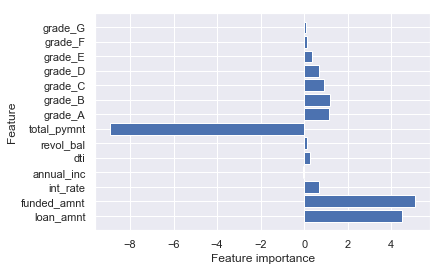

In [73]:
n_features =  X_train_scaled.shape[1]
coefs_lr = lr.coef_[0]
plt.barh(range(n_features), coefs_lr, align='center') 
plt.yticks(np.arange(n_features), list(X_train_scaled.columns.values)) 
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()

#### 7. Tune Parameters to optimize model performance: On Scaled Data
* Perform Grid-search on Sampled data to save time

In [74]:
# Cross-validation strategy: shuffles the date
cv = StratifiedShuffleSplit(n_splits = 5, random_state= 4896)

In [77]:
pipe_lr = make_pipeline(LogisticRegression(penalty = 'l2', class_weight = 'balanced', solver = 'sag', max_iter = 100, 
                        random_state = 4896))
param_grid_lr = [{'logisticregression__C':np.logspace(-3, 0, 5)}] 
grid_lr = GridSearchCV(pipe_lr, param_grid_lr, scoring = 'roc_auc', cv = cv)

In [78]:
grid_lr.fit(X_train_scaled, y_train)

/Users/pranjalbajaj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/pranjalbajaj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/pranjalbajaj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/pranjalbajaj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/pranjalbajaj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: C

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=4896, test_size='default',
            train_size=None),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('logisticregression', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=4896,
          solver='sag', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'logisticregression__C': array([0.001  , 0.00562, 0.03162, 0.17783, 1.     ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [79]:
print("Best Score %s" % grid_lr.best_score_)
print("Best Parameters %s" % grid_lr.best_params_)

Best Score 0.9811531963960071
Best Parameters {'logisticregression__C': 1.0}


In [80]:
best_param = grid_lr.best_params_.get('logisticregression__C')

#### Fit Best Parameter value 

In [81]:
lr = LogisticRegression(penalty = 'l2', 
                        C = best_param, 
                        class_weight = 'balanced', 
                        solver = 'sag', 
                        max_iter = 100, 
                        random_state = 4896) 
lr.fit(X_train_scaled, y_train)

/Users/pranjalbajaj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=4896,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)

In [82]:
y_pred = lr.predict(X_train_scaled)

In [83]:
# Evaluate model performance over these three metrics
print("Score on Train set (only)")
print("Accuracy score: {:.2f}".format(accuracy_score(y_train, y_pred)))
print("F1 score: {:.2f}".format(f1_score(y_train, y_pred)))
print("ROC AUC score: {:.2f}".format(roc_auc_score(y_train, y_pred)))

Score on Train set (only)
Accuracy score: 0.94
F1 score: 0.96
ROC AUC score: 0.96


In [84]:
cm = confusion_matrix(y_train, y_pred)
print("True Negatives:", cm[0][0])
print("False Negatives:", cm[1][0])
print("True Positives:", cm[1][1])
print("False Positives:", cm[0][1])

True Negatives: 111903
False Negatives: 24096
True Positives: 279730
False Positives: 422


#### 8. Evaluating on Test Set and Check for overfitting

In [85]:
y_pred = lr.predict(X_test_scaled)

In [86]:
# Evaluate model performance over these three metrics
print("Score on Test set")
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("F1 score: {:.2f}".format(f1_score(y_test, y_pred)))
print("ROC AUC score: {:.2f}".format(roc_auc_score(y_test, y_pred)))

Score on Test set
Accuracy score: 0.94
F1 score: 0.96
ROC AUC score: 0.96


In [87]:
cm = confusion_matrix(y_test, y_pred)
print("True Negatives:", cm[0][0])
print("False Negatives:", cm[1][0])
print("True Positives:", cm[1][1])
print("False Positives:", cm[0][1])

True Negatives: 55057
False Negatives: 11900
True Positives: 137820
False Positives: 193


#### There seems to be no overfitting since train and test scores seem to be the similar.

#### 9. Look at feature importances

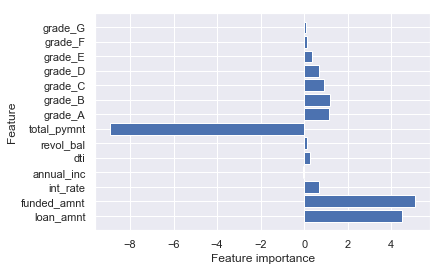

In [88]:
n_features =  X_train.shape[1]
coefs_lr = grid_lr.best_estimator_.named_steps["logisticregression"].coef_[0]
plt.barh(range(n_features), coefs_lr, align='center') 
plt.yticks(np.arange(n_features), list(X_train.columns.values)) 
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()

#### 10. Put everything in a Pipeline (To prevent any kind of data leakage)

In [89]:
# Scale Numeric Features
    
numeric_features = list(X.select_dtypes(include = ["float64"]))
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

In [90]:
# OneHotEncode Categorical Features

categorical_features = list(X.select_dtypes(exclude = ["float64"]))
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [91]:
# Add in preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [93]:
# Define steps in Pipe
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty = 'l2',
                                                        C = best_param,
                                                        class_weight = 'balanced', 
                                                        solver = 'sag', 
                                                        max_iter = 100, 
                                                        random_state = 4896))]) # solver='lbfgs'

#### Tune Parameters

In [98]:
param_grid = {
    'classifier__C': np.logspace(-3, 0, 5)
}

grid_search = GridSearchCV(pipe, param_grid, cv = cv)
grid_search.fit(X_train, y_train)

/Users/pranjalbajaj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/pranjalbajaj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/pranjalbajaj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/pranjalbajaj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/pranjalbajaj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: C

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=4896, test_size='default',
            train_size=None),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))]), ['loan_amnt', 'funded_amnt', 'int... penalty='l2', random_state=4896,
          solver='sag', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'classifier__C': array([0.001  , 0.00562, 0.03162, 0.17783, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [117]:
y_pred = pipe.predict(X_test)

In [118]:
# Evaluate model performance over these three metrics
print("Score on Test set")
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("F1 score: {:.2f}".format(f1_score(y_test, y_pred)))
print("ROC AUC score: {:.2f}".format(roc_auc_score(y_test, y_pred)))

Score on Test set
Accuracy score: 0.94
F1 score: 0.96
ROC AUC score: 0.96


In [119]:
cm = confusion_matrix(y_test, y_pred)
print("True Negatives:", cm[0][0])
print("False Negatives:", cm[1][0])
print("True Positives:", cm[1][1])
print("False Positives:", cm[0][1])

True Negatives: 54957
False Negatives: 11808
True Positives: 138004
False Positives: 201


#### Feature Importances

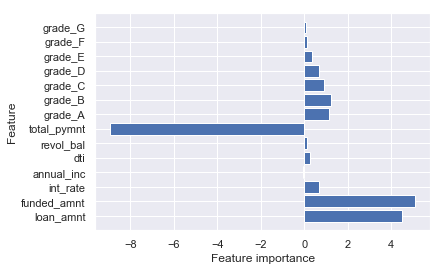

In [110]:
n_features =  X_train_scaled.shape[1]
coefs_lr = grid_search.best_estimator_.named_steps['classifier'].coef_[0]
plt.barh(range(n_features), coefs_lr, align='center') 
plt.yticks(np.arange(n_features), list(X_train_scaled)) 
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()

### Was the model effective? Explain how you validated your model and describe how you measure the performance of the model.

#### Metrics
For this study, I chose two metrics to optimize performance:
* AUC 
* F1 Score: 2 * (precision * recall) / (precision + recall)

Both of these metrics are fairly robust to class imbalance and capture our need to minimize:
- False Negatives
- False Positives

Since both these scenarios can be costly to an investor and should be minimized.

#### Model Performance
- The final scores on the test set were:

##### Metrics
* Score on Test set
* Accuracy score: 0.94
* F1 score: 0.96
* ROC AUC score: 0.96

##### Confusion Matrix Results
* True Negatives: 54957
* False Negatives: 11808
* True Positives: 138004
* False Positives: 201


#### After the pipeline, final scores on the test set were:

Overall, the model performs well according to these metrics; however, to truly gauge the performance of a model, it must be compared to a dummy classifier or a random baseline. See results below.

In [111]:
from sklearn.dummy import DummyClassifier

In [112]:
dummy = DummyClassifier(strategy='stratified', random_state=None, constant=None)
dummy.fit(X_train_scaled, y_train)
y_pred = dummy.predict(X_test_scaled)

# Evaluate model performance over these three metrics
print("Score on Test set")
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("F1 score: {:.2f}".format(f1_score(y_test, y_pred)))
print("ROC AUC score: {:.2f}".format(roc_auc_score(y_test, y_pred)))

print("Confusion Matrix Metrics")
cm = confusion_matrix(y_test, y_pred)
print("True Negatives:", cm[0][0])
print("False Negatives:", cm[1][0])
print("True Positives:", cm[1][1])
print("False Positives:", cm[0][1])

Score on Test set
Accuracy score: 0.61
F1 score: 0.73
ROC AUC score: 0.50
Confusion Matrix Metrics
True Negatives: 14815
False Negatives: 40346
True Positives: 109466
False Positives: 40343


In [120]:
print("F1 score improvement: {:.2f}%".format((0.96 - 0.73)*100 / 0.73))
print("AUC improvement: {:.2f}%".format((0.96 - 0.5)*100 / 0.5) )

F1 score improvement: 31.51%
AUC improvement: 92.00%


Compared to this dummy classifier, we seem to be doing much better in terms of both F1 Score and AUC score. I do have reason to believe that the model was effective.

#### Note on Feature Importances:
* It is key in an evaluation to draw upon feature importances and we find consitently that:
    - Total Payment, Funded Amount and Loan Amount in this order are the most important features 
    - This makes complete sense since our EDA discussed revealed that these features were the most informative!

#### Note:
* I made sure to make predicitons on the Test Set ONLY once i.e. after the model tuning stage.

* I created a new test and train split during the pipeline stage, which I used to generate another set of predicitons on the test set once after all parameters were trained. This was done to ensure that the pipeline works.

#### Further comments

Given the context of this data, using an IID split will mean that we're using future values to present the past values which doesn't seem to make much sense in the real workd. Further, effective EDA should involve looking at the temporal component of the data as well as below.

In [115]:
cohorts.reset_index(inplace = True)

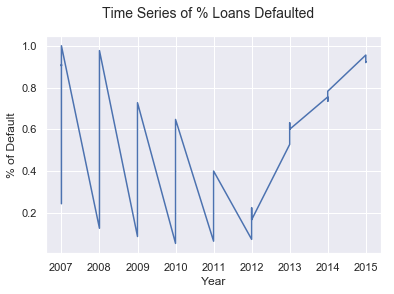

In [116]:
plt.suptitle('Time Series of % Loans Defaulted', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('% of Default', fontsize = 12)
plt.plot(cohorts['issue_d'], cohorts['perc_default'])
plt.show()

There clearly is a temporal trend in the data which makes it very difficult to assume that observations are IID.
* The recession period from 2007-9 clearly shows very high default deates, with rates slipping as they go down to 2012
* The reates begin to rise again after 2012 in a strange pattern

#### Next steps and improved modelling approaches:
* The approach should follow using, say 2007-2012 data for the train set and 2013-15 as the test set.
* To tune model parameters, it may be possible to use *TimeSeriesSplit* offered by sklearn

* Given that there were only 4 missing values, we wouldn't have gained much imputing them; however, if there were more missing values then using packages such as *fancyimpute* may make sense which impute continous data by imputing values that of similar rows
* Tree-based models such as Random Forest or XG Boost are often good performers, not prone to overfitting and equally interpretable as Logistic Regression thanks to **shap values** which allow for interpretibility of these complex models